# Data Analysis (Classification): Logistic Regression
Logistic regression performs classification based on regression to predict the probability of a binary dependent variable, or predict P(Y=1) as a function of X.

## Import Libraries

In [1]:
# Import Required Modules and Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import sys

import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve,classification_report, confusion_matrix

!pip install scikit-learn==0.23.1
!pip install imbalanced-learn==0.7.0
from imblearn.over_sampling import SMOTE, ADASYN

In [2]:
cd

/root


## Load Data

In [3]:
# Upload the X and y Data
X = pd.read_csv('Project/Cleaned/Classification/X.csv', na_values = ['..'])
y = pd.read_csv('Project/Cleaned/Classification/y.csv', na_values = ['..'])
X_train = pd.read_csv('Project/Cleaned/Classification/X_train.csv', na_values = ['..'])
X_test = pd.read_csv('Project/Cleaned/Classification/X_test.csv', na_values = ['..'])
y_train = pd.read_csv('Project/Cleaned/Classification/y_train.csv', na_values = ['..'])
y_test = pd.read_csv('Project/Cleaned/Classification/y_test.csv', na_values = ['..'])

# Drop Column
X.drop(['Unnamed: 0'], axis=1, inplace=True)
y.drop(['Unnamed: 0'], axis=1, inplace=True)
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
y_train.drop(['Unnamed: 0'], axis=1, inplace=True)
y_test.drop(['Unnamed: 0'], axis=1, inplace=True)

# Load Dictionary
dictionary_series = np.load('Project/Cleaned/dictionary_series.npy',allow_pickle='TRUE').item()

In [4]:
# Shape of Train and Test Data
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_test: (999, 20)
y_test: (999, 1)
X_train: (3993, 20)
y_train: (3993, 1)


## Logistic Regression

In [5]:
# Create and Fit Model
model_logistic = LogisticRegression().fit(X_train, y_train.values.ravel())

# Model Prediction
y_prediction = model_logistic.predict(X_test)

# Model Results
model_results = [['Score', model_logistic.score(X_train, y_train.values.ravel())],
                 ['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_logistic = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_logistic

,Evaluation Metric,Value
0,Score,0.885550
1,Accuracy,0.871872


### Synthetic Minority Oversampling Technique (SMOTE)
SMOTE will address issues with imbalance by creating synthetic samples from the minor class, and create new observations from randomly chosen k-nearest neighbors

In [6]:
# Synthetic Minority Oversampling Technique (SMOTE)
oversample = SMOTE(random_state=0)
X_oversampled_smote, y_oversampled_smote = oversample.fit_sample(X_train, y_train)

X_oversampled_smote = pd.DataFrame(data=X_oversampled_smote)
y_oversampled_smote= pd.DataFrame(data=y_oversampled_smote, columns=['y'])

print("Length of Oversampled Data:                            ",len(X_oversampled_smote))
print("Number of No Conflict entries in Oversampled Data:     ",len(y_oversampled_smote[y_oversampled_smote['y']==0]))
print("Number of Conflict entries in Oversampled Data:        ",len(y_oversampled_smote[y_oversampled_smote['y']==1]))
print("Proportion of No Conflict entries in Oversampled Data: ",len(y_oversampled_smote[y_oversampled_smote['y']==0])/len(X_oversampled_smote))
print("Proportion of Conflict entries in Oversampled Data:    ",len(y_oversampled_smote[y_oversampled_smote['y']==1])/len(X_oversampled_smote))

Length of Oversampled Data:                             5868
Number of No Conflict entries in Oversampled Data:      2934
Number of Conflict entries in Oversampled Data:         2934
Proportion of No Conflict entries in Oversampled Data:  0.5
Proportion of Conflict entries in Oversampled Data:     0.5


### Adaptive Synthetic (ADASYN)
ADASYN will address issues with imbalance in a similar method to SMOTE, in addition to, adding random small values to points to generate slightly more variance.

In [7]:
# Adaptive Synthetic (ADASYN)
oversample = ADASYN(random_state=0)
X_oversampled_adasyn, y_oversampled_adasyn = oversample.fit_sample(X_train, y_train.values.ravel())

X_oversampled_adasyn = pd.DataFrame(data=X_oversampled_adasyn)
y_oversampled_adasyn = pd.DataFrame(data=y_oversampled_adasyn, columns=['y'])

print("Length of Oversampled Data:                            ",len(X_oversampled_adasyn))
print("Number of No Conflict entries in Oversampled Data:     ",len(y_oversampled_adasyn[y_oversampled_adasyn['y']==0]))
print("Number of Conflict entries in Oversampled Data:        ",len(y_oversampled_adasyn[y_oversampled_adasyn['y']==1]))
print("Proportion of No Conflict entries in Oversampled Data: ",len(y_oversampled_adasyn[y_oversampled_adasyn['y']==0])/len(X_oversampled_adasyn))
print("Proportion of Conflict entries in Oversampled Data:    ",len(y_oversampled_adasyn[y_oversampled_adasyn['y']==1])/len(X_oversampled_adasyn))

Length of Oversampled Data:                             5880
Number of No Conflict entries in Oversampled Data:      2934
Number of Conflict entries in Oversampled Data:         2946
Proportion of No Conflict entries in Oversampled Data:  0.4989795918367347
Proportion of Conflict entries in Oversampled Data:     0.5010204081632653


## Logistic Regression with ADASYN

In [8]:
# Create and Fit Model
model_logistic = LogisticRegression().fit(X_oversampled_adasyn, y_oversampled_adasyn.values.ravel())

# Model Prediction
y_prediction = model_logistic.predict(X_test)

# Model Results
model_results = [['Score', model_logistic.score(X_oversampled_adasyn, y_oversampled_adasyn)],
                 ['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_logistic = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_logistic

,Evaluation Metric,Value
0,Score,0.74898
1,Accuracy,0.78979


## Hyperparameter Tuning

In [9]:
# Grid Search
model_logistic = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=model_logistic, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_oversampled_adasyn, y_oversampled_adasyn.values.ravel())

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    4.1s


Best Score:  0.8158994606913481
Best Params:  {'C': 1, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l1', 'solver': 'saga'}


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   15.4s finished


## Logistic Regression with GridSearch Parameters

In [10]:
# Create and Fit Model
model_logistic = LogisticRegression(C = 0.1, class_weight = {1:0.6, 0:0.4}, penalty = 'l1', solver='saga').fit(X_oversampled_adasyn, y_oversampled_adasyn.values.ravel())

# Model Prediction
y_prediction = model_logistic.predict(X_test)

# Model Results
model_results = [['Score', model_logistic.score(X_oversampled_adasyn, y_oversampled_adasyn)],
                 ['Accuracy', metrics.accuracy_score(y_test, y_prediction)]]
model_results_logistic = pd.DataFrame(model_results, columns=['Evaluation Metric', 'Value'])
model_results_logistic

,Evaluation Metric,Value
0,Score,0.732653
1,Accuracy,0.697698


## Cross-Validation

In [11]:
# Model Scores
model_scores = cross_val_score(model_logistic, X, y.values.ravel(), cv=5)

print("Model Accuracy: %0.2f (+/- % 0.2f)" % (model_scores.mean(), model_scores.std() * 2))
print("Model CV Scores: ", model_scores)

Model Accuracy: 0.86 (+/-  0.06)
Model CV Scores:  [0.84684685 0.9029029  0.88777555 0.84268537 0.82364729]


## Evaluating Model

In [12]:
# Classification Report
classification_report_logistic_table = classification_report(y_test,y_prediction, output_dict=True)
classification_report_logistic_table = pd.DataFrame(classification_report_logistic_table).transpose()
classification_report_logistic_table

,precision,recall,f1-score,support
0,0.950893,0.603399,0.738302,706.000000
1,0.491833,0.924915,0.642180,293.000000
accuracy,0.697698,0.697698,0.697698,0.697698
macro avg,0.721363,0.764157,0.690241,999.000000
weighted avg,0.816254,0.697698,0.710110,999.000000


In [13]:
# Coefficients
model_coefficients_logistic_table = pd.DataFrame(model_logistic.coef_.flatten(), X_train.columns, columns=['Coefficient'])
model_coefficients_logistic_table

,Coefficient
EG.CFT.ACCS.ZS,0.445957
EG.ELC.ACCS.RU.ZS,0.311148
EG.ELC.ACCS.UR.ZS,-0.034117
EG.FEC.RNEW.ZS,0.411301
IT.MLT.MAIN.P2,-1.199970
SE.PRM.CMPT.FE.ZS,-0.193410
SE.PRM.ENRL.TC.ZS,0.000000
SE.PRM.NENR,-0.079432
SE.PRM.TCHR.FE.ZS,0.000000
SE.SEC.CMPT.LO.FE.ZS,0.000000


In [14]:
# Confusion Matrix
model_confusion_matrix_logistic = confusion_matrix(y_test, y_prediction)
model_confusion_matrix_logistic

array([[426, 280],
       [ 22, 271]])

Text(0.5, 257.44, 'Predicted label')

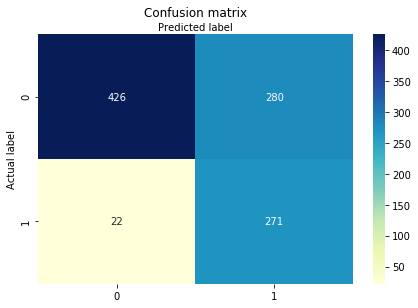

In [15]:
# Confusion Matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(model_confusion_matrix_logistic))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heat Map
sns.heatmap(pd.DataFrame(model_confusion_matrix_logistic), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

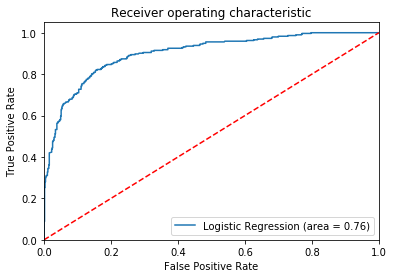

In [16]:
# ROC Curve
roc_auc_logistic = roc_auc_score(y_test, model_logistic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_logistic.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()